In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
df = pd.read_csv('test.csv')
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [6]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [8]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [9]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


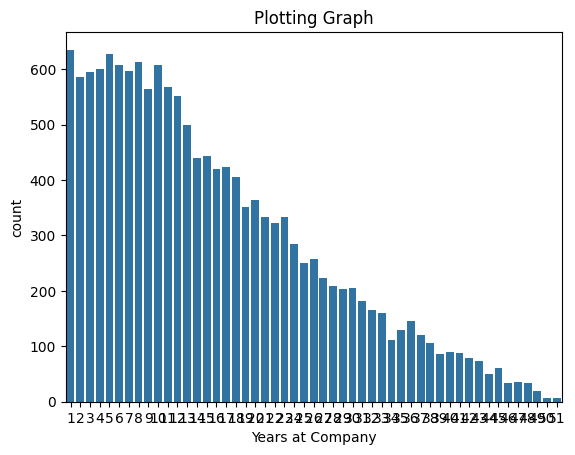

In [10]:
target_column = df['Years at Company']
sns.countplot(x= target_column, data=df)
plt.title('Plotting Graph')
plt.show()

In [11]:
df.shape

(14900, 24)

In [12]:
df.sample()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
10976,73071,34,Female,17,Media,5984,Good,High,Average,0,...,3,Mid,Medium,22,No,Yes,No,Fair,Low,Left


In [13]:
pd.set_option('display.max_columns',None)

In [14]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,83,Master’s Degree,Married,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,Yes,55,Associate Degree,Single,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,Yes,14,Associate Degree,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,43,Master’s Degree,Single,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,Yes,47,Master’s Degree,Married,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [15]:
df['Age'].unique()

array([36, 35, 50, 58, 39, 45, 22, 34, 48, 55, 32, 26, 42, 52, 37, 56, 21,
       47, 40, 23, 43, 25, 20, 57, 46, 18, 19, 29, 24, 41, 28, 30, 38, 27,
       59, 49, 53, 31, 54, 33, 51, 44], dtype=int64)

In [16]:
num_cols= df.select_dtypes(include=['int64']).columns
num_cols

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')

In [17]:
df['Work-Life Balance'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

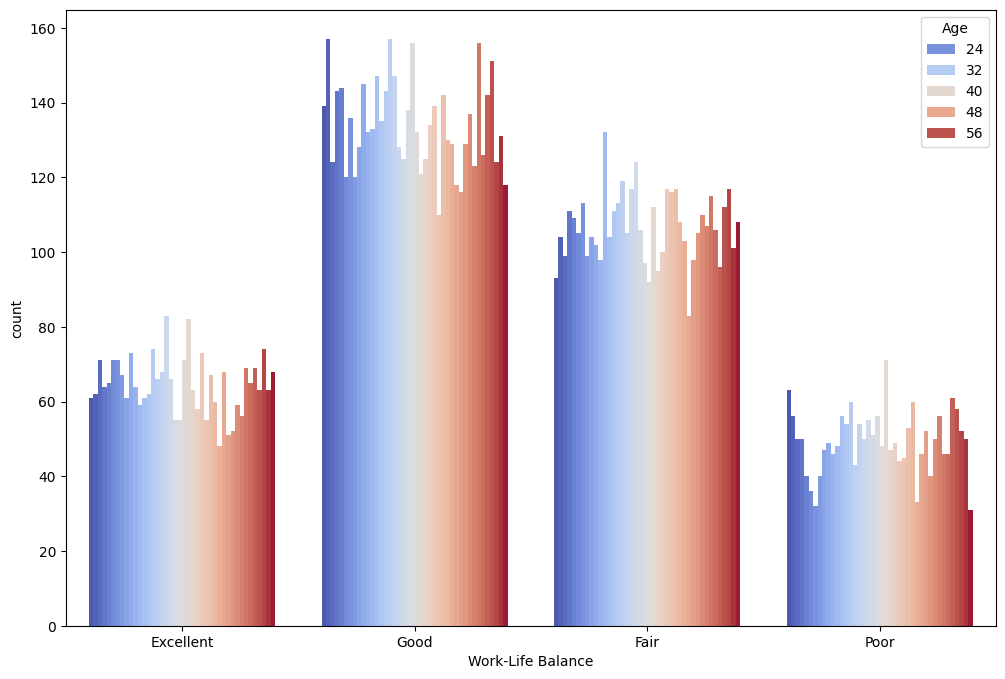

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['Work-Life Balance'], hue=df['Age'], palette="coolwarm")
plt.show()

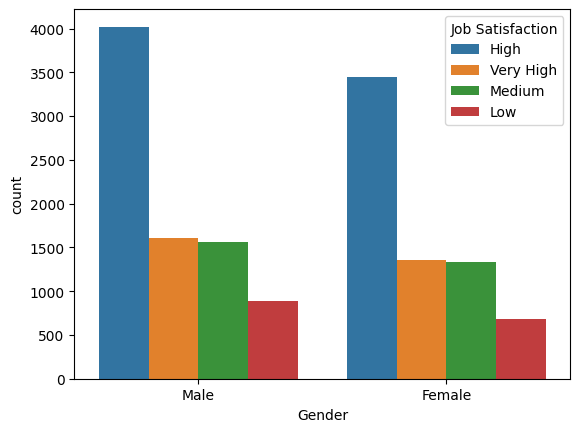

In [19]:
sns.countplot(x=df['Gender'],hue=df['Job Satisfaction'])
plt.show()

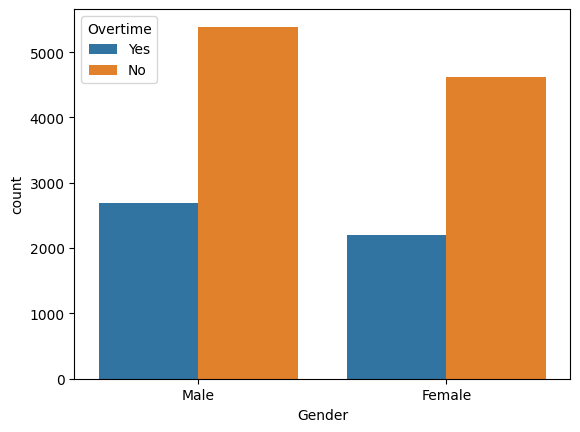

In [20]:
sns.countplot(x=df['Gender'],hue=df['Overtime'],data=df)
plt.show()

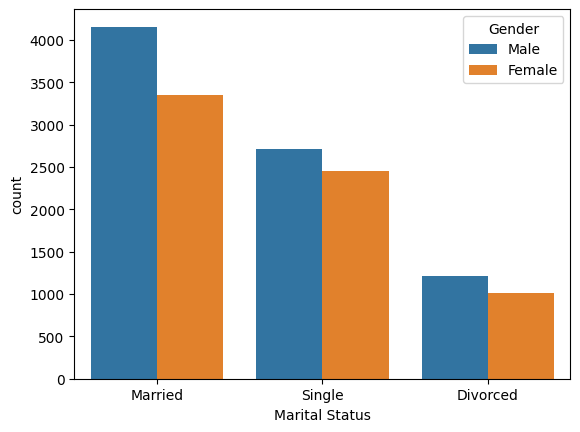

In [21]:
sns.countplot(x=df['Marital Status'],hue=df['Gender'])
plt.show()

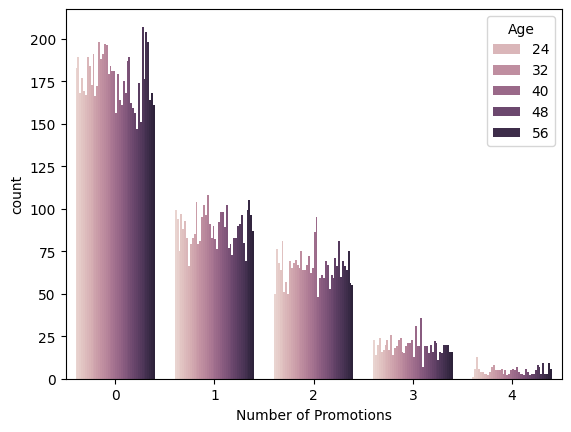

In [22]:
sns.countplot(x=df['Number of Promotions'],hue=df['Age'])
plt.show()

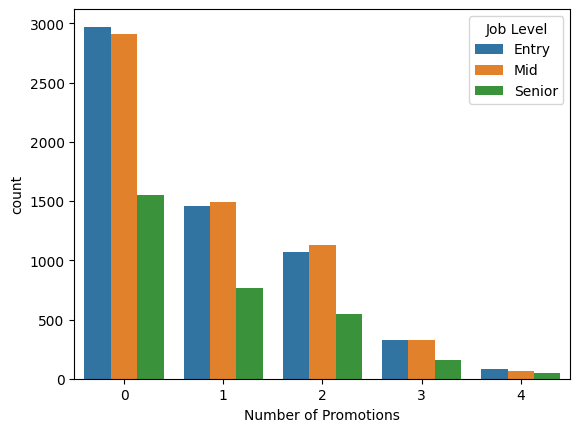

In [23]:
sns.countplot(x=df['Number of Promotions'],hue=df['Job Level'])
plt.show()

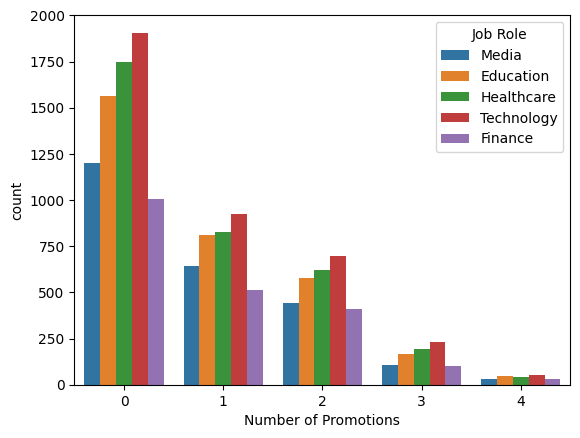

In [24]:
sns.countplot(x=df['Number of Promotions'],hue=df['Job Role'])
plt.show()

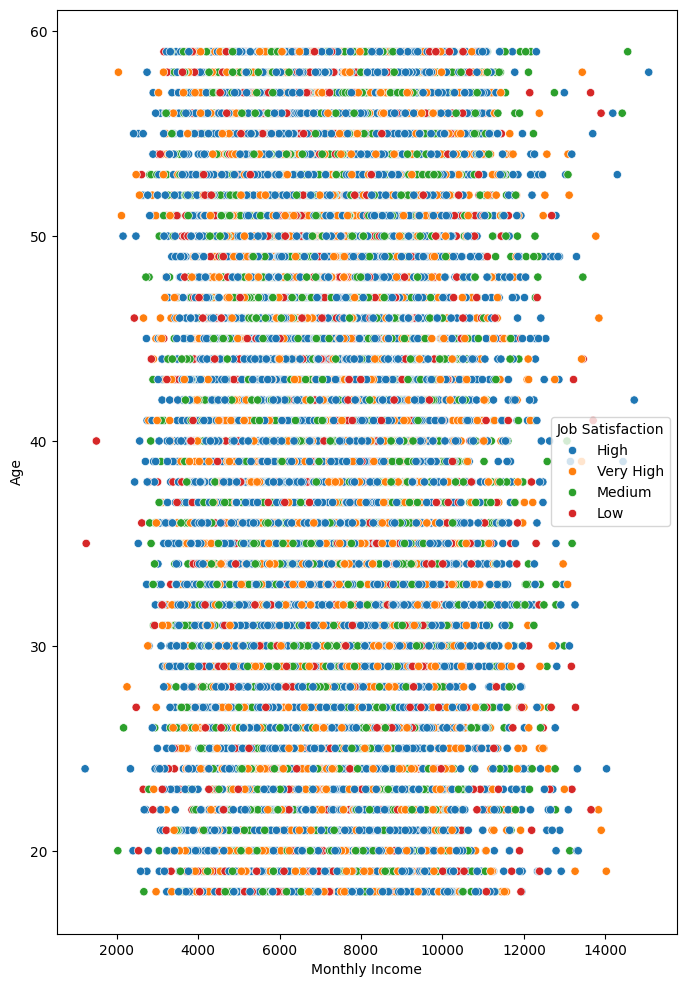

In [25]:
plt.figure(figsize=(8,12))
sns.scatterplot(x=df['Monthly Income'],y=df['Age'],data=df,hue=df['Job Satisfaction'])
plt.show()

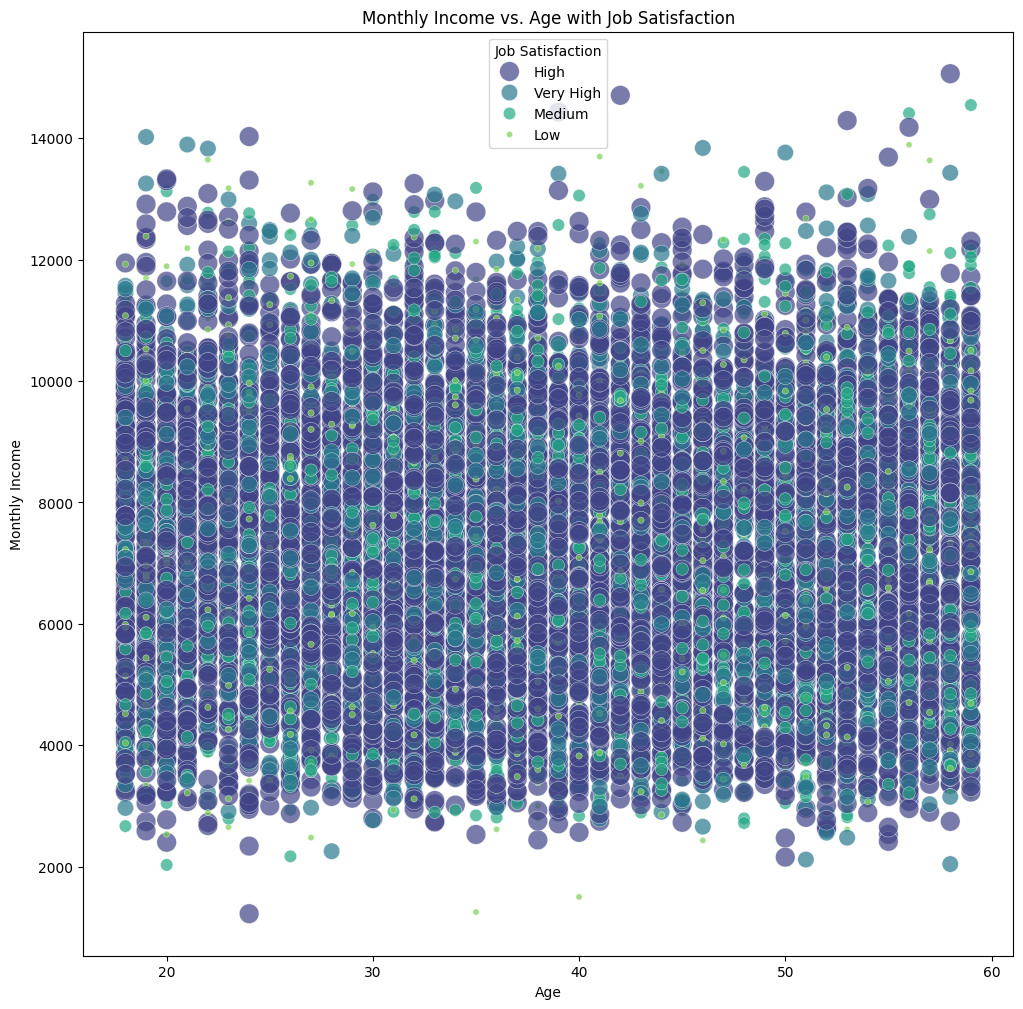

In [26]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x=df['Age'], y=df['Monthly Income'], data=df, hue='Job Satisfaction', size='Job Satisfaction', sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Monthly Income vs. Age with Job Satisfaction')
plt.show()


In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x='Company Tenure', hue='Age',data=df)
plt.show()

In [51]:
df['Gender']=df['Gender'].replace({'Male':0, 'Female':1})

In [ ]:
sns.countplot(x=df['Remote Work'],data=df,hue=df['Job Role'])


In [ ]:
df['Age'].unique()

In [41]:
from sklearn.preprocessing import LabelEncoder

In [52]:
encoding_cols=['Marital Status','Job Role','Work-Life Balance', 'Job Satisfaction','Performance Rating', 'Overtime', 'Education Level','Remote Work','Job Level', 'Company Size', 'Leadership Opportunities','Innovation Opportunities', 'Company Reputation','Employee Recognition','Attrition']  
label_encoder={}
for i in encoding_cols:
    label_encoder[i]=LabelEncoder()
    df[i]=label_encoder[i].fit_transform(df[i])


In [ ]:
df.drop(['Employee ID'], inplace=True, axis=1)

In [56]:
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,0,13,2,8029,0,0,0,1,1,83,3,1,1,1,0,22,0,0,0,3,2,1
1,35,0,7,0,4563,2,0,0,1,1,55,0,2,4,0,1,27,0,0,0,2,0,0
2,50,0,7,0,5583,1,0,0,3,1,14,0,0,2,2,1,76,0,0,1,2,1,1
3,58,0,44,3,5525,1,3,2,0,1,43,3,2,4,0,1,96,0,0,0,3,1,0
4,39,0,24,0,4604,2,0,0,0,1,47,3,1,6,1,0,45,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,1,42,2,7830,3,2,0,0,1,40,0,2,0,2,1,60,0,0,0,3,2,1
14896,30,1,15,0,3856,2,2,0,2,1,45,3,1,0,0,1,20,0,0,0,2,2,0
14897,52,0,5,0,5654,2,3,1,0,0,4,0,1,4,1,2,7,0,0,0,2,0,0
14898,18,0,4,0,5276,1,0,0,0,0,13,1,0,3,1,0,5,0,0,0,3,0,1


In [58]:
from sklearn.preprocessing import StandardScaler
stdsca=StandardScaler()

In [59]:
y=df.iloc[:,1].values

In [60]:
x=df.iloc[:,:-1].values

In [64]:
x=stdsca.fit_transform(x)
x

array([[-0.19716763, -0.91785795, -0.23284997, ..., -0.43828686,
         1.36200842,  0.99075117],
       [-0.27982935, -0.91785795, -0.77176801, ..., -0.43828686,
         0.21240634, -1.35879402],
       [ 0.96009651, -0.91785795, -0.77176801, ...,  2.28161075,
         0.21240634, -0.18402143],
       ...,
       [ 1.12541995, -0.91785795, -0.95140736, ..., -0.43828686,
         0.21240634, -1.35879402],
       [-1.68507866, -0.91785795, -1.04122703, ..., -0.43828686,
         1.36200842, -1.35879402],
       [ 1.70405202,  1.08949321,  2.91083862, ..., -0.43828686,
         0.21240634,  2.16552377]])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [66]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=13)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13)

In [67]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [68]:
y_pred=clf.predict(x_test)

In [69]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[1611,    0],
       [   0, 1369]], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred)


1.0

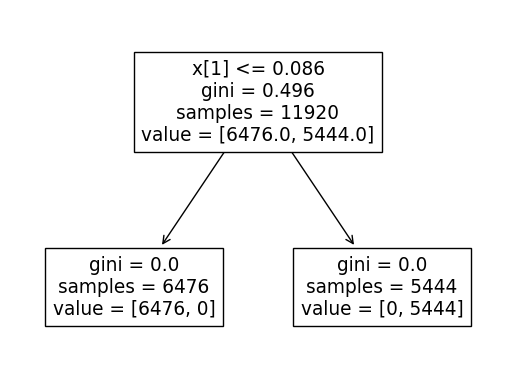

In [72]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [73]:
labels=['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59']
bins=[20,25,30,35,40,45,50,55,60]
df['Age']=pd.cut(df['Age'], bins, labels=labels,)

In [74]:
df['Age'].unique()

['35-39', '30-34', '45-49', '55-59', '40-44', '20-24', '50-54', '25-29', NaN]
Categories (8, object): ['20-24' < '25-29' < '30-34' < '35-39' < '40-44' < '45-49' < '50-54' < '55-59']

<Axes: xlabel='Gender', ylabel='count'>

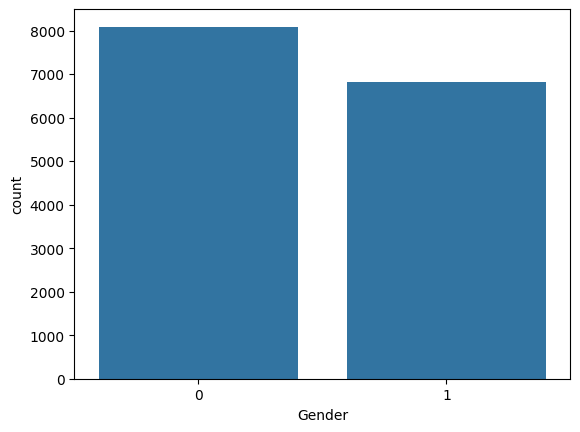

In [75]:
sns.countplot(x='Gender', data=df)